<a href="https://colab.research.google.com/github/angie-cris/angie-cris/blob/main/ConcursoKaggle_LightGBM_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Angie Cristancho y Federico Quiroga

#Preprocesamiento

##Librerías

In [ ]:
install.packages("readxl")
install.packages("tree")
install.packages("lubridate")
install.packages("ROCR")
install.packages("caret")
install.packages("randomForest")
install.packages("gbm")
install.packages("pROC")
install.packages("adabag")
install.packages("lightgbm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’, ‘gplots’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing 

In [ ]:
library(lubridate)
library(ROCR)
library(caret)
library(lightgbm)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: ggplot2

Loading required package: lattice

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


Loaded gbm 2.2.2

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



In [ ]:
data_train <- read_excel("traintelco.xlsx")
data_test  <- read_excel("testelco.xlsx")
data_train <-subset(data_train, select = -id)

In [ ]:
str(data_test)

tibble [2,000 × 10] (S3: tbl_df/tbl/data.frame)
 $ id                   : num [1:2000] 13 14 20 30 37 47 53 63 75 77 ...
 $ Fecha de nacimiento  : POSIXct[1:2000], format: "1996-10-28 20:37:48" "1985-11-08 12:29:16" ...
 $ tipo cliente         : num [1:2000] 2 2 2 1 1 2 1 1 1 1 ...
 $ Factura online       : num [1:2000] 0 1 0 1 0 0 1 0 1 0 ...
 $ Antigüedad Equipo    : num [1:2000] 18 6 35 11 34 6 15 46 8 40 ...
 $ Plan de datos        : num [1:2000] 1 1 1 1 1 1 1 1 1 1 ...
 $ facturación          : num [1:2000] 319690 333812 224201 210614 267116 ...
 $ mora                 : num [1:2000] 0 0 43 33 15 32 0 0 9 33 ...
 $ Fecha inicio contrato: POSIXct[1:2000], format: "2016-08-01 18:35:57" "2016-04-01 19:20:55" ...
 $ minutos              : num [1:2000] 1202 1403 659 912 1622 ...


##Preparación de variables

In [ ]:
#ajustar las que son fechas y quitar las que quedan
#extrayendo fechas del contrato
names(data_train)[names(data_train) == "Fecha inicio contrato"] <- "Fecha_inicio_contrato"
names(data_train)[names(data_train) == "Fecha de nacimiento"] <- "Fecha_nacimiento"

data_train$Fecha_inicio_contrato <- as.POSIXct(data_train$Fecha_inicio_contrato)
data_train$anio_inicio <- year(data_train$Fecha_inicio_contrato)
data_train$Fecha_inicio_contrato <- NULL
#Extrayendo año de fecha de nacimiento

data_train$Fecha_nacimiento <- as.POSIXct(data_train$Fecha_nacimiento)
data_train$anio_birth <- year(data_train$Fecha_nacimiento)
data_train$Fecha_nacimiento <- NULL

In [ ]:
#ajustar las que son fechas y quitar las que quedan
#extrayendo fechas del contrato
names(data_test)[names(data_test) == "Fecha inicio contrato"] <- "Fecha_inicio_contrato"
names(data_test)[names(data_test) == "Fecha de nacimiento"] <- "Fecha_nacimiento"

data_test$Fecha_inicio_contrato <- as.POSIXct(data_test$Fecha_inicio_contrato)
data_test$anio_inicio <- year(data_test$Fecha_inicio_contrato)
data_test$Fecha_inicio_contrato <- NULL
#Extrayendo año de fecha de nacimiento

data_test$Fecha_nacimiento <- as.POSIXct(data_test$Fecha_nacimiento)
data_test$anio_birth <- year(data_test$Fecha_nacimiento)
data_test$Fecha_nacimiento <- NULL

In [ ]:
#renombrar variables
names(data_train)[names(data_train) == "Antigüedad Equipo"] <- "Antiguedad_Equipo"
names(data_train)[names(data_train) == "tipo cliente"] <- "tipo_cliente"
names(data_train)[names(data_train) == "Factura online"] <- "Factura_online"
names(data_train)[names(data_train) == "Plan de datos"] <- "Plan_de_datos"
names(data_test)[names(data_test) == "Antigüedad Equipo"] <- "Antiguedad_Equipo"
names(data_test)[names(data_test) == "tipo cliente"] <- "tipo_cliente"
names(data_test)[names(data_test) == "Factura online"] <- "Factura_online"
names(data_test)[names(data_test) == "Plan de datos"] <- "Plan_de_datos"

In [ ]:
#quitar nas
data_train <- na.omit(data_train)
data_test  <- na.omit(data_test)

In [ ]:
str(data_train)

tibble [8,243 × 10] (S3: tbl_df/tbl/data.frame)
 $ tipo_cliente     : num [1:8243] 2 2 2 2 1 2 2 2 1 1 ...
 $ Factura_online   : num [1:8243] 1 0 0 1 1 1 1 1 1 0 ...
 $ Antiguedad_Equipo: num [1:8243] 9 41 38 11 6 21 5 7 6 37 ...
 $ Plan_de_datos    : num [1:8243] 0 1 1 1 0 1 0 0 1 1 ...
 $ facturación      : num [1:8243] 44588 341480 230662 205336 429525 ...
 $ mora             : num [1:8243] 34 3 20 9 0 0 30 33 2 60 ...
 $ minutos          : num [1:8243] 644 663 1039 535 1869 ...
 $ resultado        : num [1:8243] 0 0 1 0 0 0 0 0 0 0 ...
 $ anio_inicio      : num [1:8243] 2017 2017 2017 2017 2015 ...
 $ anio_birth       : num [1:8243] 1990 1980 1984 1986 1986 ...


In [ ]:
str(data_test)

tibble [2,000 × 10] (S3: tbl_df/tbl/data.frame)
 $ id               : num [1:2000] 13 14 20 30 37 47 53 63 75 77 ...
 $ tipo_cliente     : num [1:2000] 2 2 2 1 1 2 1 1 1 1 ...
 $ Factura_online   : num [1:2000] 0 1 0 1 0 0 1 0 1 0 ...
 $ Antiguedad_Equipo: num [1:2000] 18 6 35 11 34 6 15 46 8 40 ...
 $ Plan_de_datos    : num [1:2000] 1 1 1 1 1 1 1 1 1 1 ...
 $ facturación      : num [1:2000] 319690 333812 224201 210614 267116 ...
 $ mora             : num [1:2000] 0 0 43 33 15 32 0 0 9 33 ...
 $ minutos          : num [1:2000] 1202 1403 659 912 1622 ...
 $ anio_inicio      : num [1:2000] 2016 2016 2017 2018 2017 ...
 $ anio_birth       : num [1:2000] 1996 1985 1987 1981 1986 ...


In [ ]:
#hacer factor las que son categóricas
#más adelante hacemos dummy para gbm
vector0  <- c("tipo_cliente", "Factura_online", "Plan_de_datos")
data_train[vector0] <- lapply(data_train[vector0], as.factor)
data_test[vector0] <- lapply(data_test[vector0], as.factor)

## Análisis de variables

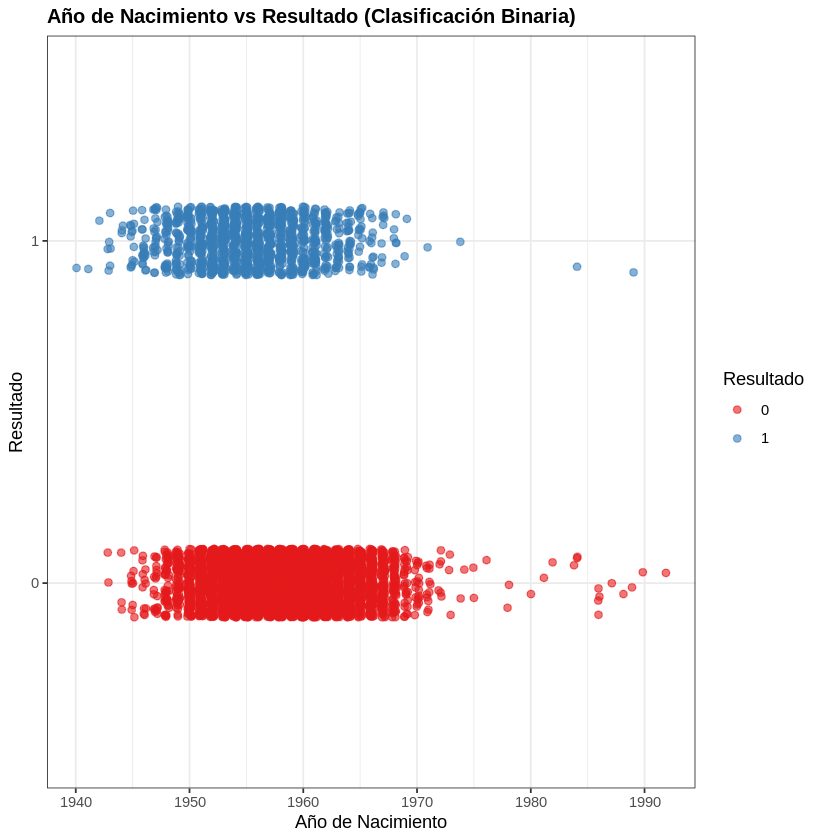

In [ ]:
library(ggplot2)

ggplot(data_train, aes(x = anio_birth, y = factor(resultado), color = factor(resultado))) +
  geom_jitter(height = 0.1, width = 0.2, alpha = 0.6, size = 1.8) +
  scale_color_brewer(palette = "Set1", name = "Resultado") +
  labs(
    title = "Año de Nacimiento vs Resultado (Clasificación Binaria)",
    x = "Año de Nacimiento",
    y = "Resultado"
  ) +
  theme_bw() +
  theme(
    plot.title = element_text(size = 12, face = "bold"),
    legend.position = "right"
  )


Año de nacimiento parece no tener una tendencia clara con un resultado específico. La diferencia en frecuencias se debe a la cantidad de registros de cada categoría.

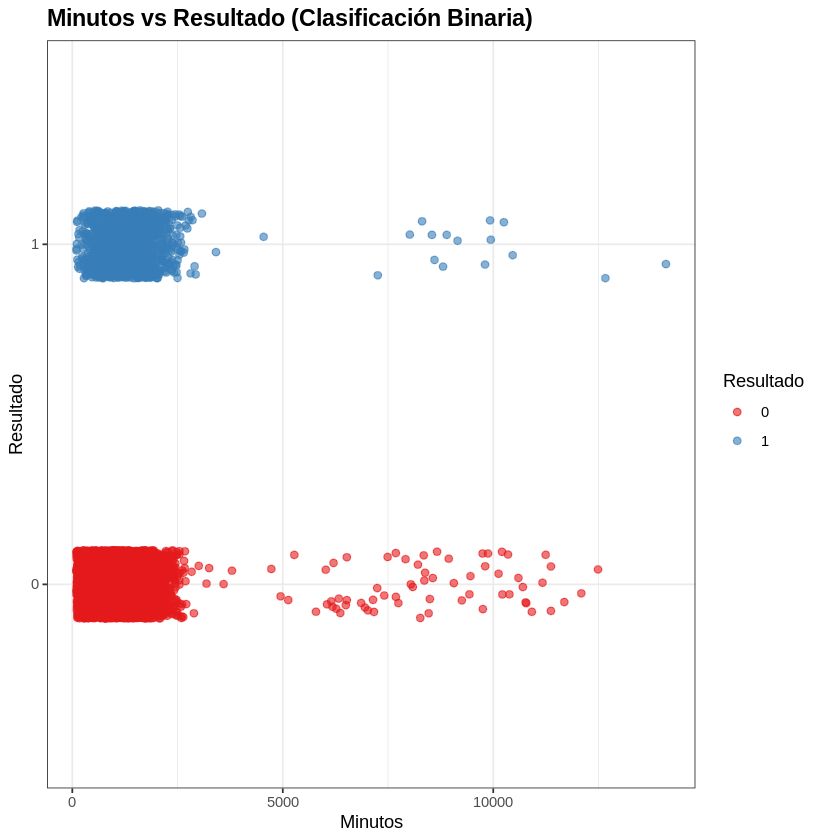

In [ ]:
library(ggplot2)

ggplot(data_train, aes(x = minutos, y = factor(resultado), color = factor(resultado))) +
  geom_jitter(height = 0.1, width = 0.3, alpha = 0.6, size = 1.8) +
  scale_color_brewer(palette = "Set1", name = "Resultado") +
  labs(
    title = "Minutos vs Resultado (Clasificación Binaria)",
    x = "Minutos",
    y = "Resultado"
  ) +
  theme_bw() +
  theme(
    plot.title = element_text(size = 14, face = "bold")
  )


Minutos exhibe un comportamiento parecido a año de nacimiento.

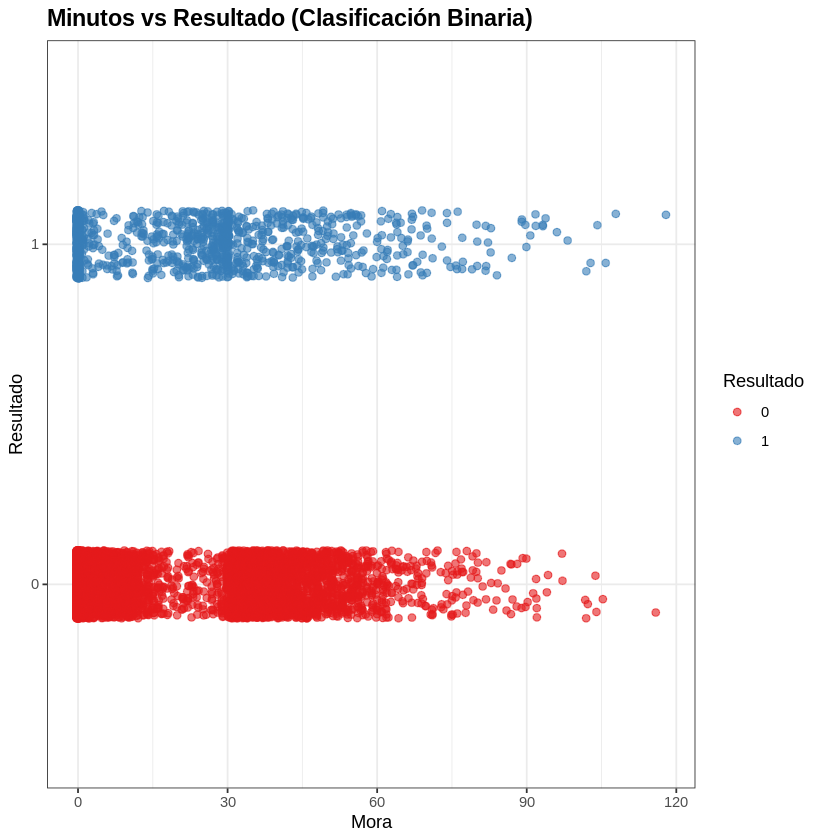

In [ ]:
ggplot(data_train, aes(x = mora, y = factor(resultado), color = factor(resultado))) +
  geom_jitter(height = 0.1, width = 0.3, alpha = 0.6, size = 1.8) +
  scale_color_brewer(palette = "Set1", name = "Resultado") +
  labs(
    title = "Minutos vs Resultado (Clasificación Binaria)",
    x = "Mora",
    y = "Resultado"
  ) +
  theme_bw() +
  theme(
    plot.title = element_text(size = 14, face = "bold")
  )

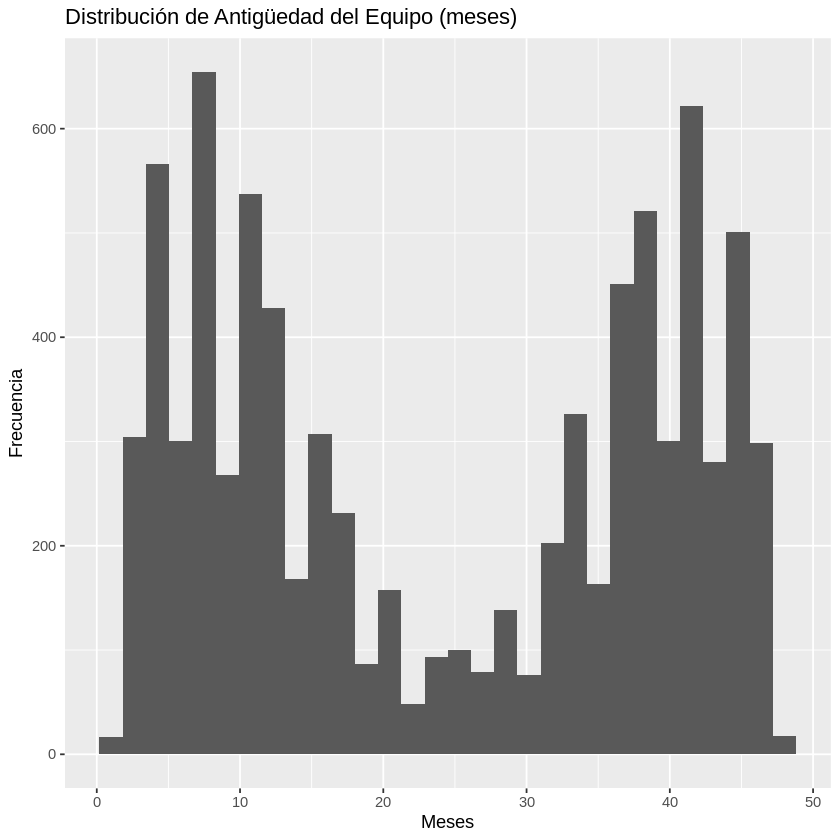

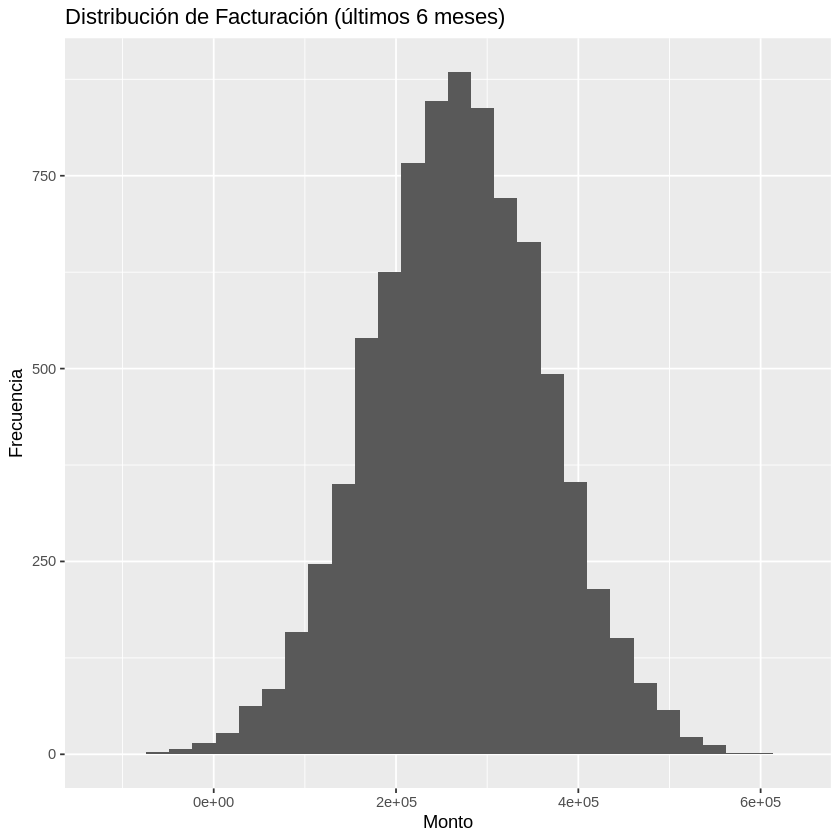

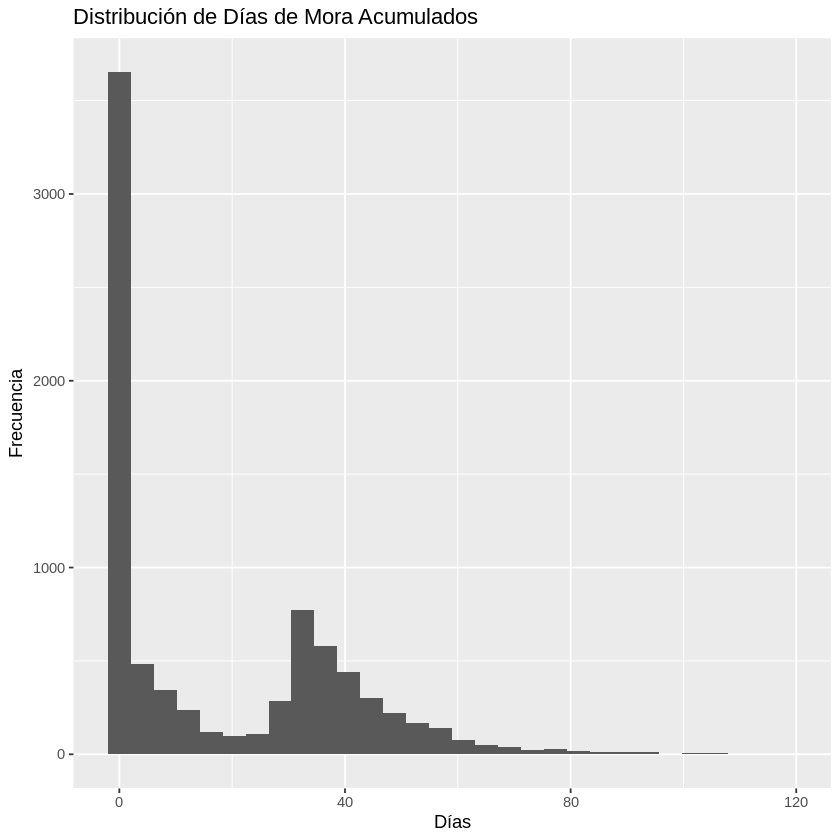

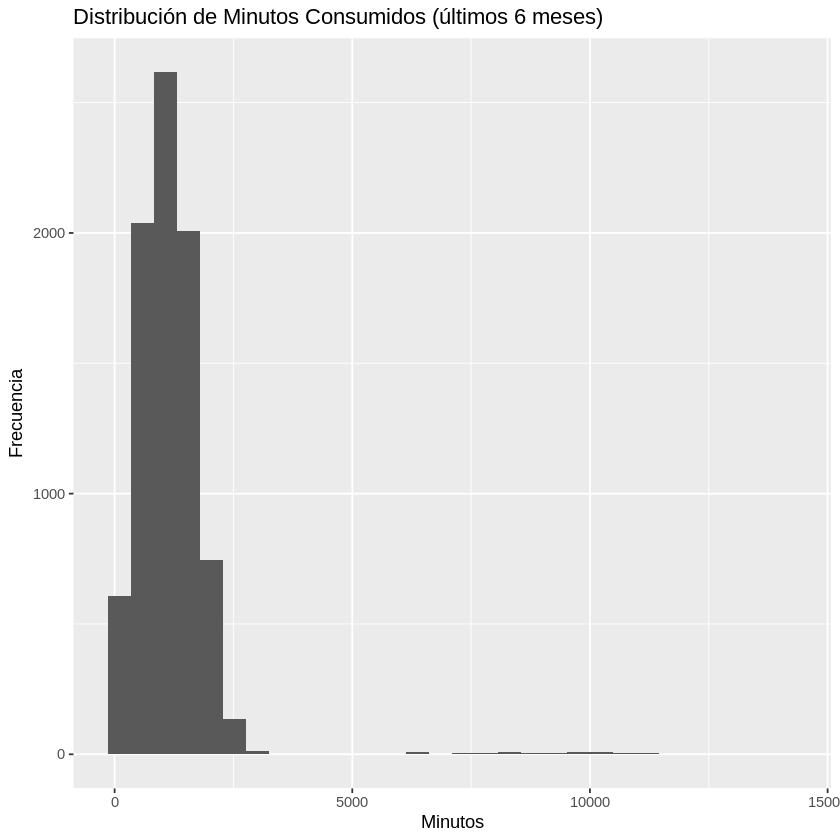

In [ ]:
ggplot(data_train, aes(x = Antiguedad_Equipo)) +
  geom_histogram(bins = 30) +
  labs(title = "Distribución de Antigüedad del Equipo (meses)",
       x = "Meses", y = "Frecuencia")

ggplot(data_train, aes(x = facturación )) +
  geom_histogram(bins = 30) +
  labs(title = "Distribución de Facturación (últimos 6 meses)",
       x = "Monto", y = "Frecuencia")

ggplot(data_train, aes(x = mora)) +
  geom_histogram(bins = 30) +
  labs(title = "Distribución de Días de Mora Acumulados",
       x = "Días", y = "Frecuencia")

ggplot(data_train, aes(x = minutos)) +
  geom_histogram(bins = 30) +
  labs(title = "Distribución de Minutos Consumidos (últimos 6 meses)",
       x = "Minutos", y = "Frecuencia")

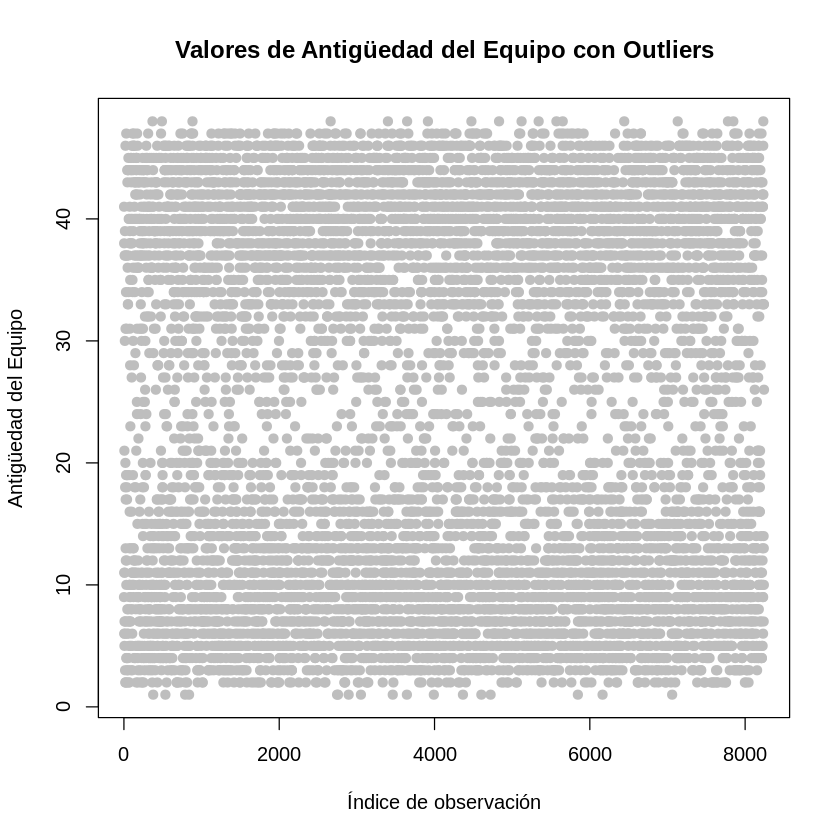

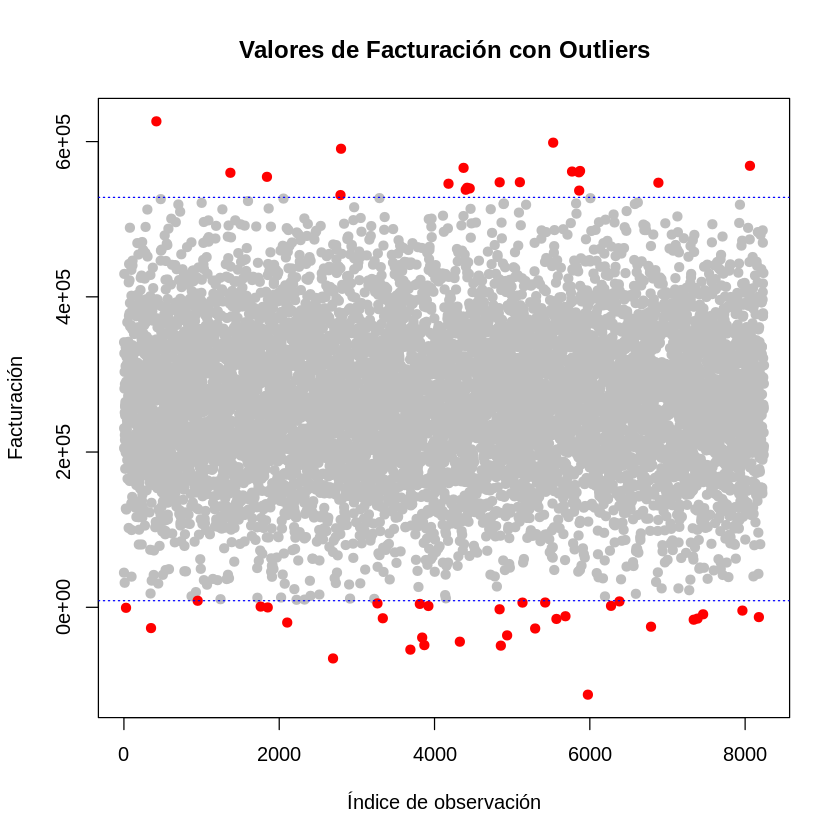

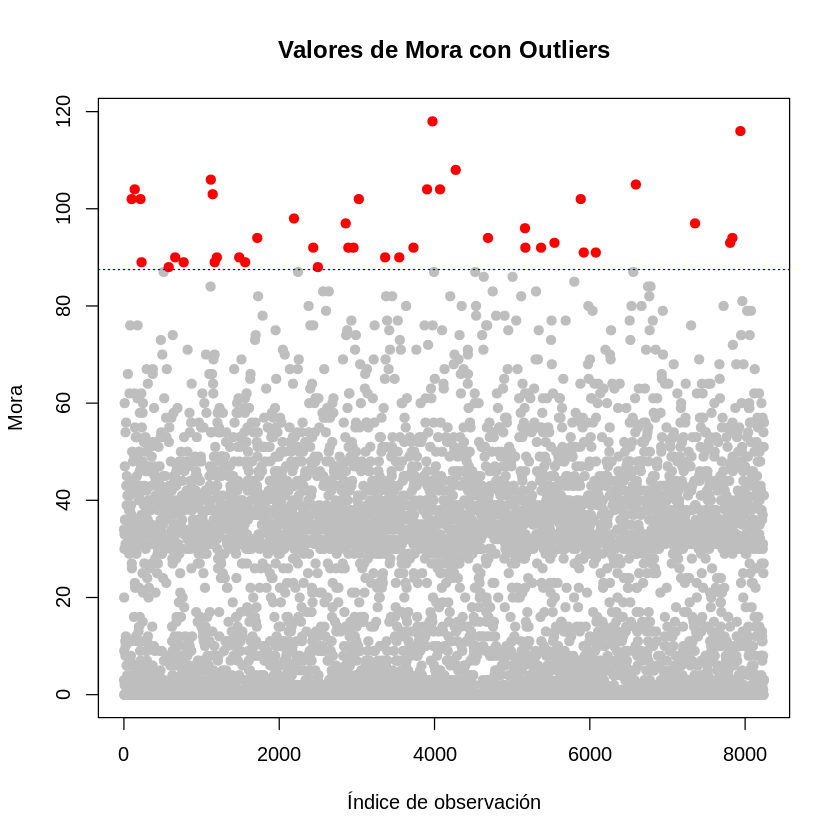

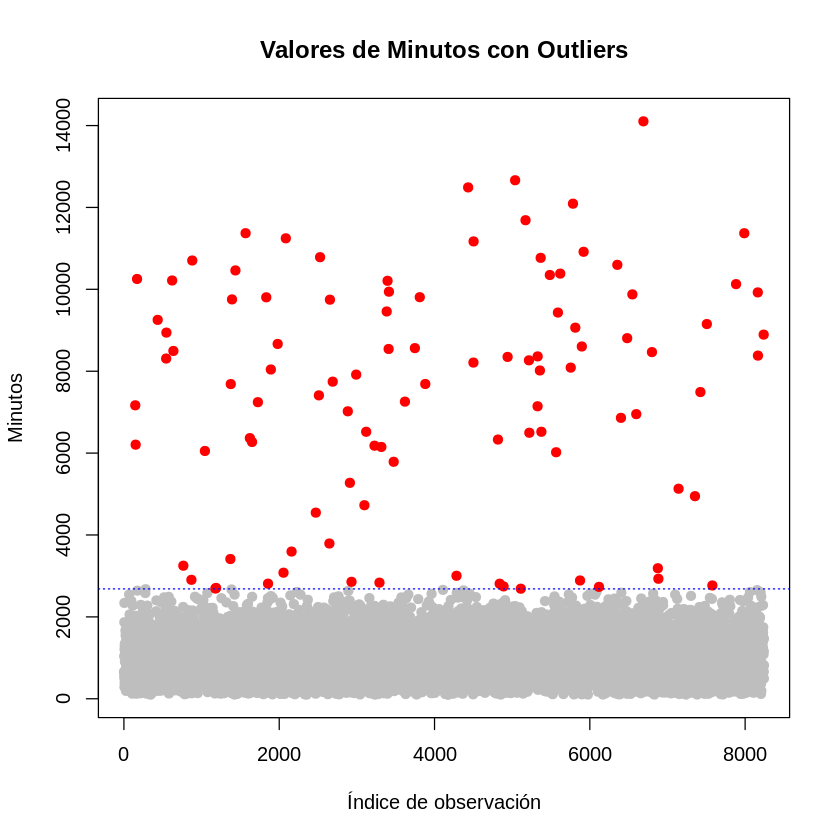

In [ ]:
detect_outliers_iqr <- function(x) {
  q1 <- quantile(x, 0.25, na.rm = TRUE)
  q3 <- quantile(x, 0.75, na.rm = TRUE)
  iqr <- q3 - q1

  lower <- q1 - 1.5 * iqr   # por qué: regla estándar para detectar outliers
  upper <- q3 + 1.5 * iqr

  list(
    outliers = which(x < lower | x > upper),
    lower = lower,
    upper = upper
  )
}

plot_outliers <- function(vec, var_name) {
  idx <- seq_along(vec)
  res <- detect_outliers_iqr(vec)

  plot(
    x = idx, y = vec,
    col = ifelse(idx %in% res$outliers, "red", "grey"),
    pch = 19,
    main = paste("Valores de", var_name, "con Outliers"),
    xlab = "Índice de observación",
    ylab = var_name
  )

  abline(h = res$lower, col = "blue", lty = 3)
  abline(h = res$upper, col = "blue", lty = 3)
}

plot_outliers(data_train$Antiguedad_Equipo, "Antigüedad del Equipo")
plot_outliers(data_train$facturación, "Facturación")
plot_outliers(data_train$mora, "Mora")
plot_outliers(data_train$minutos, "Minutos")

Minutos evidencia una gran dispersión en sus datos, mora puede tener tendencias a valores extremos, pero son pocos y antiguedad del equipo demuestra un rango amplio de valores estandarizados

In [ ]:
detect_outliers_iqr <- function(x) {
  q1 <- quantile(x, 0.25, na.rm = TRUE)
  q3 <- quantile(x, 0.75, na.rm = TRUE)
  iqr <- q3 - q1

  lower <- q1 - 1.5 * iqr
  upper <- q3 + 1.5 * iqr

  outliers <- which(x < lower | x > upper)

  list(
    outlier_index = outliers,
    lower = lower,
    upper = upper
  )
}

# Antiguedad
out_antig <- detect_outliers_iqr(data_train$Antiguedad_Equipo)
length(out_antig$outlier_index)

# Facturación
out_fact <- detect_outliers_iqr(data_train$facturación)
length(out_fact$outlier_index)

# Mora
out_mora <- detect_outliers_iqr(data_train$mora)
length(out_mora$outlier_index)

# Minutos
out_min <- detect_outliers_iqr(data_train$minutos)
length(out_min$outlier_index)

[1] 0

[1] 51

[1] 41

[1] 101

En específico, minutos exhibe 101 outliers, mora 41, facturación 51 y antiguedad, por ser valores estandarizados, ninguno

## Split para validación interna

In [ ]:
set.seed(956)
train_index <- sample(1:nrow(data_train), floor(0.75 * nrow(data_train)))
train <- data_train[train_index, ]
valid <- data_train[-train_index, ]

In [ ]:
train$resultado <- as.factor(train$resultado)
valid$resultado <- as.factor(valid$resultado)

#Modelos

## Stepwise

In [ ]:
reg_logistica0<-glm(resultado~.,family=binomial,train, trace=0)
#trace=0 impide ver todos los detalles de la optimización stepwise
steplogit<-step(reg_logistica0, direction="both")
summary(steplogit)

Start:  AIC=4652.21
resultado ~ tipo_cliente + Factura_online + Antiguedad_Equipo + 
    Plan_de_datos + facturación + mora + minutos + anio_inicio + 
    anio_birth

                    Df Deviance    AIC
- Antiguedad_Equipo  1   4630.9 4650.9
<none>                   4630.2 4652.2
- Factura_online     1   4634.0 4654.0
- minutos            1   4635.1 4655.1
- Plan_de_datos      1   4637.4 4657.4
- anio_inicio        1   4649.5 4669.5
- mora               1   4657.8 4677.8
- tipo_cliente       2   4819.7 4837.7
- anio_birth         1   4977.5 4997.5
- facturación        1   4983.5 5003.5

Step:  AIC=4650.87
resultado ~ tipo_cliente + Factura_online + Plan_de_datos + facturación + 
    mora + minutos + anio_inicio + anio_birth

                    Df Deviance    AIC
<none>                   4630.9 4650.9
+ Antiguedad_Equipo  1   4630.2 4652.2
- minutos            1   4635.7 4653.7
- Factura_online     1   4637.5 4655.5
- Plan_de_datos      1   4638.2 4656.2
- anio_inicio        1   465


Call:
glm(formula = resultado ~ tipo_cliente + Factura_online + Plan_de_datos + 
    facturación + mora + minutos + anio_inicio + anio_birth, 
    family = binomial, data = train, trace = 0)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      7.563e+02  1.063e+02   7.113 1.13e-12 ***
tipo_cliente2    3.979e-01  8.243e-02   4.826 1.39e-06 ***
tipo_cliente3    1.579e+00  1.125e-01  14.032  < 2e-16 ***
Factura_online1  2.127e-01  8.242e-02   2.581  0.00985 ** 
Plan_de_datos1   3.093e-01  1.159e-01   2.669  0.00761 ** 
facturación      7.991e-06  4.520e-07  17.681  < 2e-16 ***
mora             1.242e-02  2.336e-03   5.319 1.04e-07 ***
minutos          8.454e-05  3.757e-05   2.250  0.02442 *  
anio_inicio     -2.303e-01  5.173e-02  -4.451 8.53e-06 ***
anio_birth      -1.518e-01  8.665e-03 -17.520  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance:

Podemos ver que las variables que el modelo step consideró más importantes incluyen la facturación, mora, anio_inicio y anio_birth. Sin embargo, en el estudio inicial no encontramos una relación entre anio_birth y el posible resultado, sería más importante estudiar los valores más altos de mora tienden hacia un resultado negativo.


##  LightGBM

In [ ]:
#convertimos el inner split en matrices para train y valid
# TRAIN
X_train <- train[, setdiff(names(train), "resultado")]
y_train <- as.numeric(as.character(train$resultado))  # 0/1

# TEST
X_test <- valid[, setdiff(names(valid), "resultado")]
y_test <- as.numeric(as.character(valid$resultado))    # 0/1
#
X_train_mm <- model.matrix(~ . - 1, data = X_train)
X_test_mm  <- model.matrix(~ . - 1, data = X_test)

In [ ]:
dtrain <- lgb.Dataset(
  data = X_train_mm,
  label = y_train
)

dtest <- lgb.Dataset(
  data = X_test_mm,
  label = y_test,
  reference = dtrain
)

In [ ]:
# Parámetros
params <- list(
  objective = "binary",
  metric = "binary_logloss",
  boosting = "gbdt", #indica el tipo de boosting a realizar, gbdt = gradient boosting.
  learning_rate = 0.025
)
#hicimos varias pruebas de tasa de aprendizaje, 0.08, 1 y 1.5, pero definitivamente el 0.1 ofrece un mejor AUC

model <- lgb.train(
  params = params,
  data = dtrain,
  nrounds = 220,
  valids = list(test = dtest),
  #dtest el data set de prueba, el algoritmo lo usa para evaluarce a si mismo
  early_stopping_rounds = 10,
  # Indica el numero de iteraciones que deben pasar si mejora para parar el modelo.
  verbose = 1
)

[LightGBM] [Info] Number of positive: 1014, number of negative: 5168
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 708
[LightGBM] [Info] Number of data points in the train set: 6182, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.164025 -> initscore=-1.628583
[LightGBM] [Info] Start training from score -1.628583
[1]:  test's binary_logloss:0.447658 
Will train until there is no improvement in 10 rounds.
[2]:  test's binary_logloss:0.44296 
[3]:  test's binary_logloss:0.437942 
[4]:  test's binary_logloss:0.43383 
[5]:  test's binary_logloss:0.42929 
[6]:  test's binary_logloss:0.425506 
[7]:  test's binary_logloss:0.4219 
[8]:  test's binary_logloss:0.418605 
[9]:  test's binary_logloss:0.415376 
[10]:  test's binary_logloss:0.411956 
[11]:  test's b

In [ ]:
predictions <- predict(model, newdata = X_test_mm)

# Create a prediction object
pred_roc <- prediction(predictions, y_test)

# Calculate AUC
perf_auc <- performance(pred_roc, "auc")
auc_value1 <- as.numeric(perf_auc@y.values)

print(paste("AUC on validation set:", round(auc_value, 4)))

[1] "AUC on validation set: 0.8574"


In [ ]:
id_test <- data_test$id
data_test_pred <- data_test[, setdiff(names(data_test), "id")]
X_test_kaggle_mm  <- model.matrix(~ . - 1, data = data_test_pred)

pred_test_kaggle <- predict(model, newdata = X_test_kaggle_mm, type="prob")

submission <- data.frame(
  id = id_test,
  resultado = pred_test_kaggle
)

write.csv(submission, "submission_lightgbm3cb.csv", row.names = FALSE)

## GBM

In [ ]:
data_train_gbm <- train
data_train_gbm$resultado <- as.numeric(as.character(train$resultado))
#str(data_train_gbm)

GBoost <- gbm(resultado~., data = data_train_gbm, distribution = "bernoulli", n.trees = 390,shrinkage = 0.25)

# 1 Calcular predicciones
predM3 <- predict(GBoost, newdata = valid, type='response')

Using 390 trees...




In [ ]:
predictions2 <- predict(GBoost, newdata = valid)

# Create a prediction object
pred_roc <- prediction(predictions2, y_test) #y_test es lo mismo que la variable objetivo de valid

# Calculate AUC
perf_auc <- performance(pred_roc, "auc")
auc_value2 <- as.numeric(perf_auc@y.values)

print(paste("AUC on validation set:", round(auc_value, 4)))

Using 390 trees...




[1] "AUC on validation set: 0.8574"


In [ ]:
pred_test_kaggle2 <- predict(GBoost, newdata = data_test_pred, type="response")

submission <- data.frame(
  id = id_test,
  resultado = pred_test_kaggle2
)

write.csv(submission, "submission_GBMCL.csv", row.names = FALSE)

Using 390 trees...




## XGBOOST

In [ ]:
install.packages("xgboost")
library(xgboost)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Procesamiento requerido para XGBoost
X_train_numeric <- model.matrix(~ . - 1, data = X_train)
X_test_numeric <- model.matrix(~ . - 1, data = X_test)

# Convertir y_train y y_test en binario
y_train_binary <- as.numeric(y_train == "1")
y_test_binary <- as.numeric(y_test == "0")

# Crear los DMatrix necesarios para xgboost
dtrain <- xgb.DMatrix(data = X_train_numeric, label = y_train_binary)
dtest <- xgb.DMatrix(data = X_test_numeric, label = y_test_binary)

In [ ]:
# Primer clasificador XGBOOST
params <- list(
  objective = "binary:logistic",  # Para clasificación binaria
  eval_metric = "logloss"        # Métrica de evaluación: logloss
)

# Entrenar el modelo
xgb_model <- xgb.train(
  params = params,
  data = dtrain,
  nrounds = 100
)

In [ ]:
predictions3 <- predict(xgb_model, newdata = dtest)

# Create a prediction object
pred_roc <- prediction(predictions, y_test)

# Calculate AUC
perf_auc <- performance(pred_roc, "auc")
auc_value3 <- as.numeric(perf_auc@y.values)

print(paste("AUC on validation set:", round(auc_value3, 4)))

[1] "AUC on validation set: 0.8574"


In [ ]:
X_test_kaggle_numeric <- model.matrix(~ . - 1, data = data_test_pred)
d_test_kaggle <- xgb.DMatrix(data = X_test_kaggle_numeric)

pred_test_kaggle3 <- predict(xgb_model, newdata = d_test_kaggle)

submission <- data.frame(
  id = id_test,
  resultado = pred_test_kaggle3
)

write.csv(submission, "submission_XGBOOSTCL.csv", row.names = FALSE)

#Conclusiones

In [ ]:
#Comparación de AUC con validación interna
cat("AUC para LightGBM: ", auc_value1, "\n")
cat("AUC para GBM: ", auc_value2, "\n")
cat("AUC para XGBoost: ", auc_value3)

AUC para LightGBM:  0.8574479 
AUC para GBM:  0.8531167 
AUC para XGBoost:  0.8574479

Comportamientos muy similares, mejores para xgboost y lightgbm, pero hay que confirmar con los resultados de Kaggle